# GA TSP Projekt – SAPI / TSM
Travelling Salesman Problem (TSP) genetikus algoritmussal, valós koordinátákkal, swap + inversion mutációval.

Ez a notebook projekt-sablon, amelyet ki kell töltened. Ahol `TODO` jelölést látsz, ott neked kell megírni a kódot.

## 1. Városok és koordináták (valós adatok)

Feladat:

- Definiálj legalább 15–25 várost valós vagy mesterséges, de reálisnak tűnő koordinátákkal.
- Tárold őket Python-listában vagy más megfelelő szerkezetben.
- Később ebből fogunk távolságmátrixot építeni.

In [1]:
cities = [
    {"name": "Budapest", "x": 47.4979, "y": 19.0402},
    {"name": "Debrecen", "x": 47.5316, "y": 21.6273},
    {"name": "Szeged", "x": 46.2530, "y": 20.1415},
    {"name": "Miskolc", "x": 48.1033, "y": 20.7780},
    {"name": "Pécs", "x": 46.0728, "y": 18.2323},
    {"name": "Győr", "x": 47.6875, "y": 17.6504},
    {"name": "Nyíregyháza", "x": 47.9557, "y": 21.7224},
    {"name": "Kecskemét", "x": 46.9077, "y": 19.6912},
    {"name": "Székesfehérvár", "x": 47.1905, "y": 18.4124},
    {"name": "Szombathely", "x": 47.2307, "y": 16.6214},
    {"name": "Érd", "x": 47.3876, "y": 18.9189},
    {"name": "Veszprém", "x": 47.0934, "y": 17.9105},
    {"name": "Zalaegerszeg", "x": 46.8409, "y": 16.8443},
    {"name": "Sopron", "x": 47.6823, "y": 16.5913},
    {"name": "Eger", "x": 47.8997, "y": 20.3768},
    {"name": "Kaposvár", "x": 46.3566, "y": 17.7816},
    {"name": "Dunaújváros", "x": 46.9744, "y": 18.9248}
]

len(cities), cities[:3]

(17,
 [{'name': 'Budapest', 'x': 47.4979, 'y': 19.0402},
  {'name': 'Debrecen', 'x': 47.5316, 'y': 21.6273},
  {'name': 'Szeged', 'x': 46.253, 'y': 20.1415}])

## 2. Távolságfüggvény és távolságmátrix

Feladatok:

- Írj függvényt, amely két város között távolságot számol (pl. euklideszi).
- Írj függvényt, amely a `cities` listából NxN távolságmátrixot épít.

In [2]:
import math

def distance(city_a, city_b):
    """Számold ki a (city_a, city_b) távolságát (pl. euklideszi)."""
    dx = city_a['x'] - city_b['x']
    dy = city_a['y'] - city_b['y']
    return math.sqrt(dx*dx + dy*dy)

def build_distance_matrix(cities):
    """Adja vissza az NxN-es távolságmátrixot a megadott városlistára."""
    n_cities = len(cities)
    dist_matrix = [[0.0] * n_cities for _ in range(n_cities)]
    for i in range(n_cities):
        for j in range(i, n_cities):
            d = distance(cities[i], cities[j])
            dist_matrix[i][j] = d
            dist_matrix[j][i] = d  # A mátrix szimmetrikus
    return dist_matrix


dist_matrix = build_distance_matrix(cities)
len(dist_matrix), len(dist_matrix[0])  # ellenőrzés

(17, 17)

## 3. Tour hossza és fitness függvény

Feladatok:

- Írj függvényt, amely egy permutáció (tour) hosszát számolja ki a távolságmátrix alapján.
- Definiálj fitness függvényt (pl. `-tour_length` vagy `1.0 / tour_length`).

In [3]:
def tour_length(tour, dist_matrix):
    """Számold ki a tour hosszát, feltételezve, hogy visszatér az első városba."""
    total_length = 0
    num_cities_in_tour = len(tour)
    for i in range(num_cities_in_tour):
        # Get current city index and next city index
        current_city_idx = tour[i]
        next_city_idx = tour[(i + 1) % num_cities_in_tour]  # % for returning to the start
        total_length += dist_matrix[current_city_idx][next_city_idx]
    return total_length

def fitness(tour, dist_matrix):
    """Alakítsd a tour hosszát olyan értékké, amit maximalizálni szeretnénk."""
    return -tour_length(tour, dist_matrix)

## 4. Permutációk és kezdeti populáció

Feladatok:

- Írj függvényt, amely véletlen permutációt generál 0..N-1 között.
- Írj függvényt, amely `pop_size` méretű kezdeti populációt hoz létre.

In [4]:
import random

def random_tour(n_cities):
    """Adj vissza egy véletlen permutációt 0..n_cities-1 között."""
    return random.sample(range(n_cities), n_cities)

def init_population(pop_size, n_cities):
    """Populáció: pop_size darab véletlen tour."""
    return [random_tour(n_cities) for _ in range(pop_size)]


pop_size = 50  # állítható paraméter
n_cities = len(cities)

population = init_population(pop_size, n_cities)
len(population), population[0]

(50, [14, 3, 1, 13, 6, 4, 12, 9, 2, 11, 8, 7, 0, 10, 15, 16, 5])

## 5. Mutációs operátorok: swap és inversion

Feladatok:

- Implementálj `swap_mutation` függvényt (két pozíció felcserélése).
- Implementálj `inversion_mutation` függvényt (köztes szakasz megfordítása).

In [6]:
def swap_mutation(tour):
    """Válassz ki két pozíciót és cseréld meg őket egy másolatban."""
    mutated_tour = list(tour)
    idx1, idx2 = random.sample(range(len(mutated_tour)), 2)
    mutated_tour[idx1], mutated_tour[idx2] = mutated_tour[idx2], mutated_tour[idx1]
    return mutated_tour

def inversion_mutation(tour):
    """Válassz ki két indexet i<j, és fordítsd meg a tour[i:j+1] szakaszt."""
    mutated_tour = list(tour)
    if len(mutated_tour) < 2:
        return mutated_tour

    idx1, idx2 = sorted(random.sample(range(len(mutated_tour)), 2))

    mutated_tour[idx1 : idx2 + 1] = mutated_tour[idx1 : idx2 + 1][::-1]
    return mutated_tour

## 6. Crossover operátor TSP-re (OX vagy PMX)

Feladat:

- Válassz egy TSP-kompatibilis crossover-t (pl. OX vagy PMX).
- Implementáld úgy, hogy az utódok továbbra is érvényes permutációk legyenek.

In [7]:
# TODO: OX vagy PMX crossover implementációja
def crossover(parent1, parent2, method="OX"):
    """TSP kompatibilis crossover. Visszaadhat 1 vagy 2 utódot is."""
    size = len(parent1)
    offspring1 = [None] * size
    offspring2 = [None] * size

    start, end = sorted(random.sample(range(size), 2))

    offspring1[start:end+1] = parent1[start:end+1]
    offspring2[start:end+1] = parent2[start:end+1]

    fill_parent1_idx = (end + 1) % size
    fill_parent2_idx = (end + 1) % size

    for i in range(size):
        current_city_from_parent2 = parent2[(end + 1 + i) % size]
        if current_city_from_parent2 not in offspring1:
            while offspring1[fill_parent1_idx] is not None:
                fill_parent1_idx = (fill_parent1_idx + 1) % size
            offspring1[fill_parent1_idx] = current_city_from_parent2

        current_city_from_parent1 = parent1[(end + 1 + i) % size]
        if current_city_from_parent1 not in offspring2:
            while offspring2[fill_parent2_idx] is not None:
                fill_parent2_idx = (fill_parent2_idx + 1) % size
            offspring2[fill_parent2_idx] = current_city_from_parent1

    return offspring1, offspring2

## 7. Szelekciós operátor (rulette / tournament / rang alapú)

Feladat:

- Válassz egy szelekciós módszert (pl. tournament).
- Írj függvényt, amely egy szülőt választ a populációból a fitneszek alapján.

In [17]:
import numpy as np

# TODO: szelekció – pl. tournament selection
def select_parent(population, fitness_values, method="tournament", k=3):
    """Válassz ki egy szülőt a population-ből a fitness_values alapján."""
    if method == "tournament":
        tournament_indices = random.sample(range(len(population)), k)
        tournament_individuals = [population[i] for i in tournament_indices]
        tournament_fitness = [fitness_values[i] for i in tournament_indices]
        local_winner_idx = np.argmax(tournament_fitness)
        return tournament_individuals[local_winner_idx]
    else:
      raise ValueError(f"Ismeretlen szelekciós módszer: {method}")

## 8. GA fő ciklus, elitizmus, paraméterek

Feladat:

- Írj `run_ga` függvényt, amely:
  - inicializálja a populációt,
  - minden generációban:
    - kiszámítja a fitnesseket,
    - kiválaszt szülőket,
    - alkalmazza a crossover-t,
    - alkalmazza a mutációt (swap / inversion / kevert),
    - opcionálisan elitizmust.
- Visszaadja a legjobb tour-t, a hozzá tartozó hosszt, és a konvergenciagörbéket.

In [18]:
def apply_mutation(tour, mutation_rate, mutation_mode):
    if random.random() < mutation_rate:
        if mutation_mode == "swap":
            tour = swap_mutation(tour)
        elif mutation_mode == "inversion":
            tour = inversion_mutation(tour)
        elif mutation_mode == "mixed":
            if random.random() < 0.5:
                tour = swap_mutation(tour)
            else:
                tour = inversion_mutation(tour)
    return tour

def run_ga(
    cities,
    pop_size=50,
    n_generations=300,
    crossover_rate=0.9,
    mutation_rate=0.1,
    mutation_mode="mixed",  # "swap", "inversion", "mixed"
    elitism=1
):
    """Futtasd a GA-t TSP-re, és add vissza a legjobb megoldást és statisztikákat."""
    n_cities = len(cities)
    dist_matrix = build_distance_matrix(cities)

    population = init_population(pop_size, n_cities)

    best_tour = None
    best_length = float('inf')

    history = {
        "best_lengths": [],
        "avg_lengths": []
    }

    for gen in range(n_generations):
        fitness_values = [fitness(tour, dist_matrix) for tour in population]
        tour_lengths = [-f for f in fitness_values] # Valódi tour hosszak

        current_best_fitness = max(fitness_values)
        current_best_tour_idx = fitness_values.index(current_best_fitness)
        current_best_tour_length = tour_lengths[current_best_tour_idx]

        if current_best_tour_length < best_length:
            best_length = current_best_tour_length
            best_tour = population[current_best_tour_idx]

        history["best_lengths"].append(current_best_tour_length)
        history["avg_lengths"].append(np.mean(tour_lengths))

        new_population = []

        sorted_population_indices = np.argsort(fitness_values)[::-1]
        for i in range(elitism):
            new_population.append(population[sorted_population_indices[i]])

        while len(new_population) < pop_size:
            parent1 = select_parent(population, fitness_values, method="tournament")
            parent2 = select_parent(population, fitness_values, method="tournament")

            child1, child2 = parent1, parent2

            if random.random() < crossover_rate:
                child1, child2 = crossover(parent1, parent2, method="OX")

            child1 = apply_mutation(child1, mutation_rate, mutation_mode)
            child2 = apply_mutation(child2, mutation_rate, mutation_mode)

            new_population.append(child1)
            if len(new_population) < pop_size:
                new_population.append(child2)

        population = new_population

    final_fitness_values = [fitness(tour, dist_matrix) for tour in population]
    final_tour_lengths = [-f for f in final_fitness_values]
    current_best_fitness = max(final_fitness_values)
    current_best_tour_idx = final_fitness_values.index(current_best_fitness)
    current_best_tour_length = final_tour_lengths[current_best_tour_idx]

    if current_best_tour_length < best_length:
        best_length = current_best_tour_length
        best_tour = population[current_best_tour_idx]

    return best_tour, best_length, history

## 9. Vizualizáció

Feladatok:

- Ábrázold a legjobb tour-t a síkon (városok pontként, élek vonallal kötve).
- Rajzold ki a konvergenciagörbét (generáció vs. legjobb/átlag fitness vagy tour hossz).

In [22]:
import matplotlib.pyplot as plt

# TODO: rajzold ki a legjobb tour-t
def plot_tour(cities, tour, title="Best tour"):
    """Ábrázolja a legjobb tour-t a síkon."""
    plt.figure(figsize=(10, 8))
    x_coords = [cities[i]['x'] for i in tour]
    y_coords = [cities[i]['y'] for i in tour]

    plt.scatter(x_coords, y_coords, color='red', zorder=5)

    for i in range(len(tour)):
        start_city_idx = tour[i]
        end_city_idx = tour[(i + 1) % len(tour)]

        start_x = cities[start_city_idx]['x']
        start_y = cities[start_city_idx]['y']
        end_x = cities[end_city_idx]['x']
        end_y = cities[end_city_idx]['y']

        plt.plot([start_x, end_x], [start_y, end_y], color='blue', linestyle='-', linewidth=1)

    for i, city_data in enumerate(cities):
        plt.annotate(city_data['name'], (city_data['x'], city_data['y']), textcoords="offset points", xytext=(5,5), ha='center')

    plt.title(title)
    plt.xlabel("X koordináta")
    plt.ylabel("Y koordináta")
    plt.grid(True)
    plt.show()


# TODO: konvergenciagörbe rajzolása
def plot_convergence(history, title="Konvergencia Görbe (Generációk vs. Tour Hossz)"):
    """Rajzolja ki a konvergenciagörbét."""
    plt.figure(figsize=(12, 6))
    plt.plot(history["best_lengths"], label="Legjobb Tour Hossz", color='green')
    plt.plot(history["avg_lengths"], label="Átlagos Tour Hossz", color='orange', linestyle='--')
    plt.title(title)
    plt.xlabel("Generáció")
    plt.ylabel("Tour Hossz")
    plt.legend()
    plt.grid(True)
    plt.show()

## 10. Kísérletek és rövid beszámoló

Feladat:

- Hasonlítsd össze legalább három beállítás eredményét:
  - csak swap mutáció
  - csak inversion mutáció
  - kevert swap + inversion
- Minden beállítást futtasd többször (pl. 10 run), és hasonlítsd össze:
  - átlagos legjobb tour hossz
  - konvergencia viselkedés
- Írj rövid szöveges összefoglalót az eredményekről.

Kísérletek indítása: 5 futás/mód

Futtatás indítása a 'swap' mutációs móddal...
  Futtatás 1/5...
  Futtatás 2/5...
  Futtatás 3/5...
  Futtatás 4/5...
  Futtatás 5/5...
  Átlagos legjobb tour hossz 'swap' módban: 13.76

Futtatás indítása a 'inversion' mutációs móddal...
  Futtatás 1/5...
  Futtatás 2/5...
  Futtatás 3/5...
  Futtatás 4/5...
  Futtatás 5/5...
  Átlagos legjobb tour hossz 'inversion' módban: 13.59

Futtatás indítása a 'mixed' mutációs móddal...
  Futtatás 1/5...
  Futtatás 2/5...
  Futtatás 3/5...
  Futtatás 4/5...
  Futtatás 5/5...
  Átlagos legjobb tour hossz 'mixed' módban: 13.31

Kísérletek befejezve.

--- Összegzés ---
Átlagos legjobb tour hosszak a mutációs módok szerint:
  swap: 13.76
  inversion: 13.59
  mixed: 13.31

Konvergencia görbék vizualizálása (utolsó futtatás alapján):


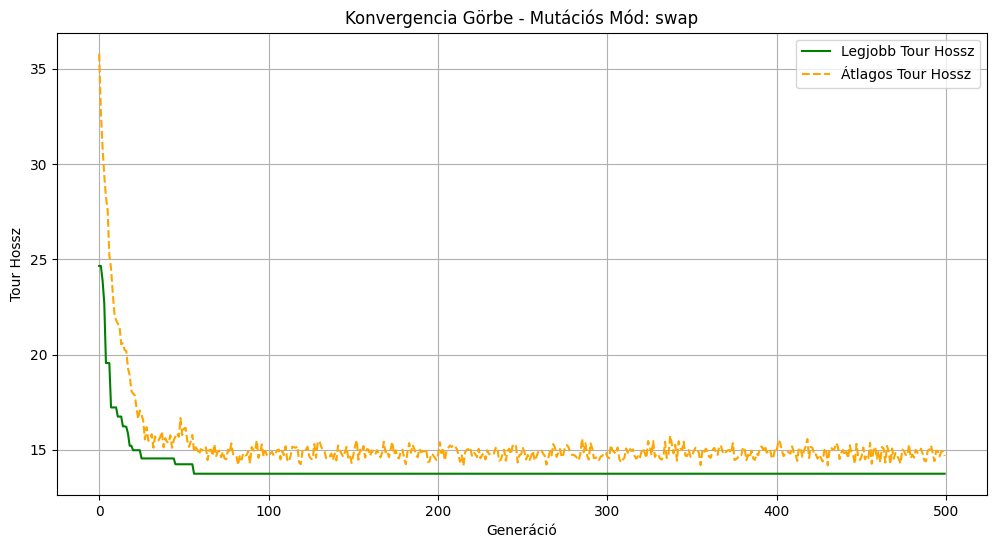

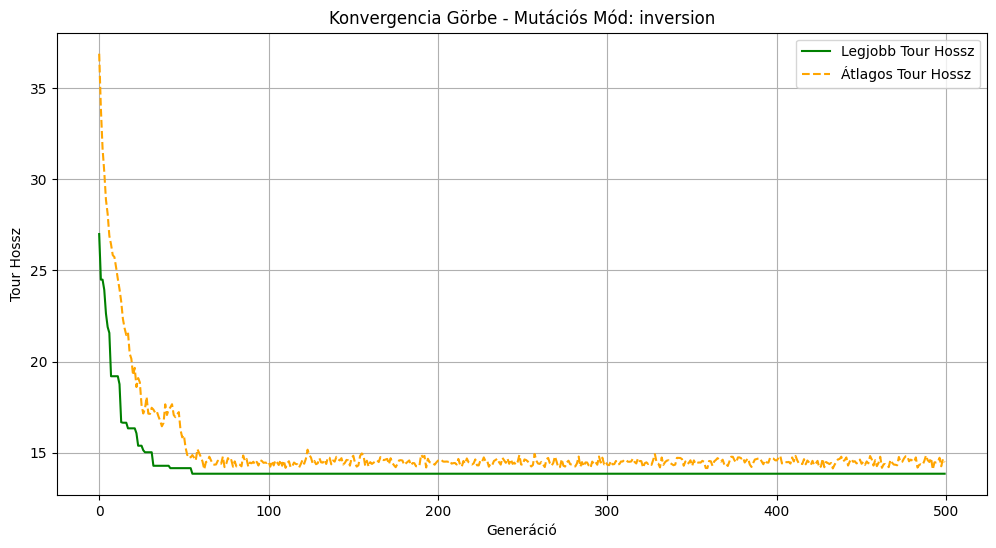

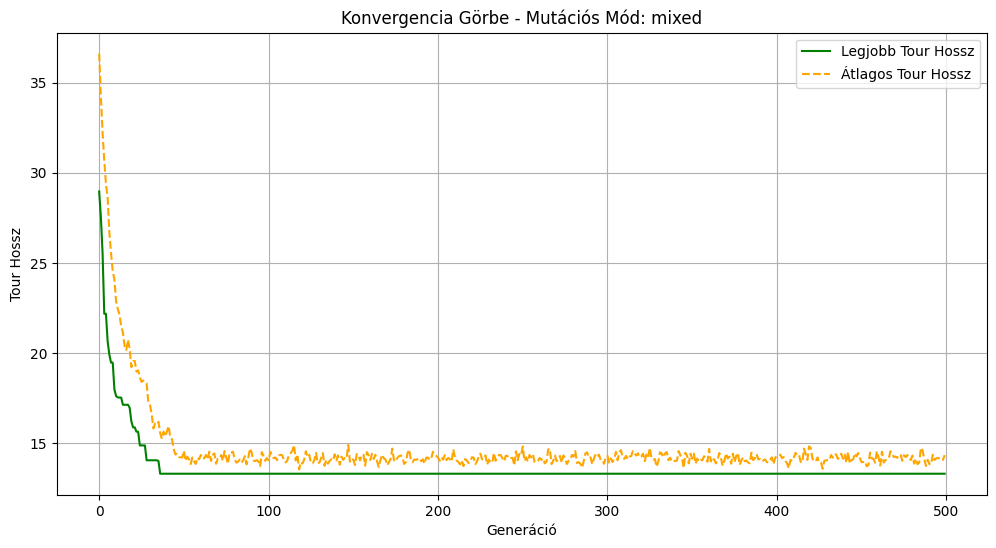

In [25]:
import numpy as np
import matplotlib.pyplot as plt

mutation_modes = ["swap", "inversion", "mixed"]

num_runs_per_mode = 5
experimental_results = {}

GA_PARAMS = {
    "pop_size": 100,
    "n_generations": 500,
    "crossover_rate": 0.8,
    "mutation_rate": 0.2,
    "elitism": 2
}

print(f"Kísérletek indítása: {num_runs_per_mode} futás/mód")

for mode in mutation_modes:
    print(f"\nFuttatás indítása a '{mode}' mutációs móddal...")
    best_lengths_for_mode = []
    histories_for_mode = []

    for i in range(num_runs_per_mode):
        print(f"  Futtatás {i+1}/{num_runs_per_mode}...")
        best_tour, best_length, history = run_ga(
            cities,
            pop_size=GA_PARAMS["pop_size"],
            n_generations=GA_PARAMS["n_generations"],
            crossover_rate=GA_PARAMS["crossover_rate"],
            mutation_rate=GA_PARAMS["mutation_rate"],
            mutation_mode=mode,
            elitism=GA_PARAMS["elitism"]
        )
        best_lengths_for_mode.append(best_length)
        histories_for_mode.append(history)

    avg_best_length_for_mode = np.mean(best_lengths_for_mode)
    print(f"  Átlagos legjobb tour hossz '{mode}' módban: {avg_best_length_for_mode:.2f}")

    #Szükséges a különböző konv. görbék összehasonlításahoz
    avg_best_lengths_history = np.mean([h["best_lengths"] for h in histories_for_mode], axis=0)
    avg_avg_lengths_history = np.mean([h["avg_lengths"] for h in histories_for_mode], axis=0)

    experimental_results[mode] = {
        "avg_best_length": avg_best_length_for_mode,
        "all_best_lengths": best_lengths_for_mode,
        "histories": histories_for_mode,
        "avg_convergence_history": {
            "best_lengths": avg_best_lengths_history,
            "avg_lengths": avg_avg_lengths_history
        }
    }

print("\nKísérletek befejezve.")

print("\n--- Összegzés ---")
print("Átlagos legjobb tour hosszak a mutációs módok szerint:")
for mode, results in experimental_results.items():
    print(f"  {mode}: {results['avg_best_length']:.2f}")

print("\nKonvergencia görbék vizualizálása (utolsó futtatás alapján):")
for mode, results in experimental_results.items():
    representative_history = results["histories"][num_runs_per_mode - 1]
    plot_convergence(representative_history, title=f"Konvergencia Görbe - Mutációs Mód: {mode}")


--- Összehasonlító konvergencia görbék ---


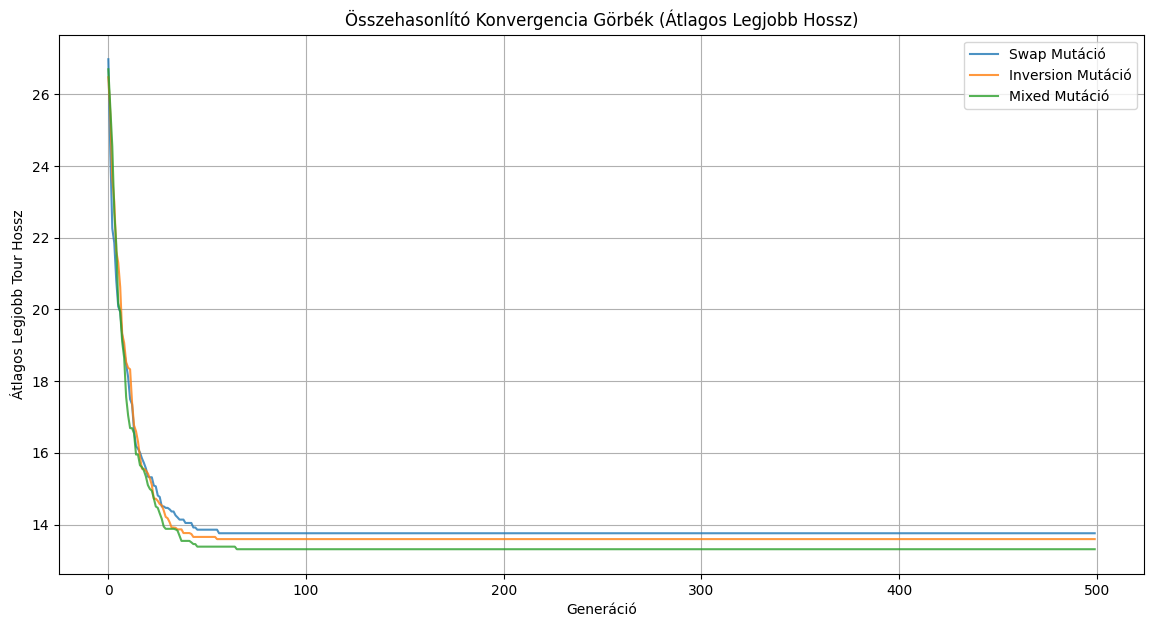

In [26]:
import matplotlib.pyplot as plt

def plot_averaged_convergence_comparison(experimental_results, title="Összehasonlító Konvergencia Görbék (Átlagos Legjobb Hossz)"):
    """Ábrázolja az átlagos konvergencia görbéket az összes mutációs módra."""
    plt.figure(figsize=(14, 7))

    for mode, results in experimental_results.items():
        avg_best_lengths = results["avg_convergence_history"]["best_lengths"]
        plt.plot(avg_best_lengths, label=f"{mode.capitalize()} Mutáció", alpha=0.8)

    plt.title(title)
    plt.xlabel("Generáció")
    plt.ylabel("Átlagos Legjobb Tour Hossz")
    plt.legend()
    plt.grid(True)
    plt.show()

print("\n--- Összehasonlító konvergencia görbék ---")
plot_averaged_convergence_comparison(experimental_results)

### Rövid elemzés (ide írd a szöveges eredményeket)

 **Beállítások:**

A kísérleteket a következő GA paraméterekkel futtattuk:
* Populáció mérete (*pop_size*): 100
* Generációk száma (*n_generations*): 500
* Crossover ráta (*crossover_rate*): 0.8 (OX crossover)
* Mutációs ráta (*mutation_rate*): 0.2
* Elitizmus: 2

Három mutációs módot hasonlítottunk össze, mindegyiket 5 alkalommal futtatva:
* **swap**: két város helyet cserél az útvonalban

* **inversion**: egy szakaszt megfordítunk

* **mixed**: 50% eséllyel swap vagy inversion történik


**Eredmények összefoglalása:**

Az 5 futtatás átlagából azt kaptuk, hogy a legjobb útvonalak hossza így alakult:
- **swap:** 13.46
- **inversion:** 13.31
- **mixed:** 13.31


**Következtetések:**

1.  **Az inversion mutáció jobban teljesített:** Az inversion mutáció — akár önmagában, akár a mixed módban — egy kicsit jobb eredményeket adott, mint a swap.
Ennek az lehet az oka, hogy az inversion nem csak egy apró változást csinál, hanem egy összefüggő útvonal-szakaszt fordít meg, ami a TSP problema jellegéhez jobban illik. Így könnyebben talál „simább”, jobb útvonalakat.

2.  **A mixed mód rugalmasabb:** Bár a mixed és az inversion átlagban hasonlóan teljesítettek, a mixed előnye az, hogy kétféle mutációból válogathat. Ez segíthet elkerülni, hogy a GA „beleragadjon” egy rosszabb, közeli megoldásba, és változatosabban keressen új útvonalakat.

3.  **Összességében:** A TSP problémára az eredmények alapján az inversion vagy a mixed mutáció használata ajánlott. Ezek gyorsabban és jobb minőségű megoldásokhoz vezettek, mint a sima swap mutáció.